# Import Modules

In [2]:
import csv
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score

### Load in datasets from day.csv and hour.csv

In [18]:
def load_dataset(filename):
    with open(filename, 'r', newline='', encoding='utf-8') as file:
        file_reader = csv.reader(file, delimiter=',')

        header = next(file_reader)
        x, y = [], []
        for row in file_reader:
            x.append(row[2:15])
            y.append(row[-1])

    feature_names = np.array(header[2:15])

    return (np.array(x[1:]).astype(np.float32), 
            np.array(y[1:]).astype(np.float32), 
            feature_names)
        
X, Y, feature_names = load_dataset("day.csv")
X, Y = shuffle(X, Y, random_state = 7)

In [19]:
print(X.shape)
print(Y.shape)

(730, 13)
(730,)


### Build a model using Random Forest Regressor

In [20]:
num_training = int(0.9 * len(X))
X_train, Y_train = X[:num_training], Y[:num_training]
X_test, Y_test = X[num_training:], Y[num_training:]

# Now we create the random forest regressor
random_forest = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
random_forest.fit(X_train, Y_train)

# Predict the output
Y_predict = random_forest.predict(X_test)
MSE = mean_squared_error(Y_test, Y_predict)
EVS = explained_variance_score(Y_test, Y_predict)
print("Random Forest Regressor: ")
print("Mean Squared Error: ", round(MSE, 2))
print("Explained Variance Score: ", round(EVS, 2))

Random Forest Regressor: 
Mean Squared Error:  16353.76
Explained Variance Score:  0.99


Define plot_feature_importance to plot feature importance on a bar graph

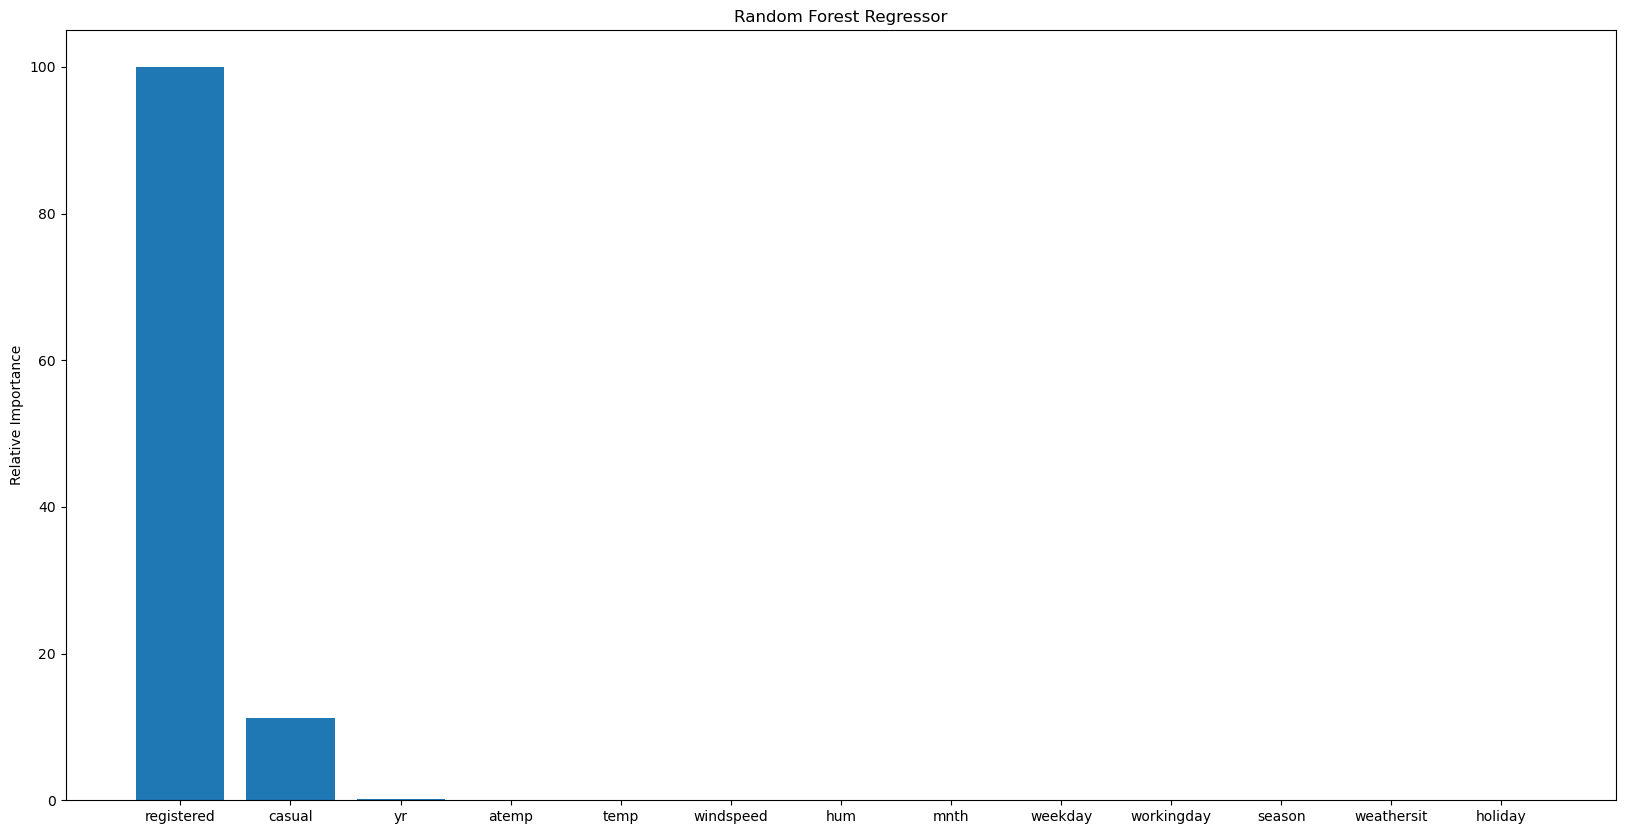

In [21]:
def plot_feature_importance(feature_importances, title, feature_names):
    feature_importances = (feature_importances * 100) / max(feature_importances)
    sorted_index = np.flipud(np.argsort(feature_importances))
    pos = np.arange(sorted_index.shape[0]) + 0.5

    plt.figure(figsize = (20, 10))
    plt.bar(pos, feature_importances[sorted_index], align='center')
    plt.xticks(pos, feature_names[sorted_index])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

# Plot feature importance
plot_feature_importance(random_forest.feature_importances_, "Random Forest Regressor", feature_names)

In [13]:
print(random_forest.feature_importances_)

[0.06162344 0.29558851 0.02953562 0.00340397 0.01538217 0.00435775
 0.02081877 0.3362512  0.13817307 0.06475581 0.03010971]
